In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.insert(0, '..')

from Approximators import SKApproximator, AAAApproximator, PolelessBarycentric
import Approximators.Bernstein.CauchySimplex as Bernstein
import Approximators.LinearizedBernstein.CauchySimplex as LinearizedBernstein

In [3]:
# import Approximators
# Approximators.ignore_warnings()

In [4]:
n = 10
m = n

approximators = {'Bernstein': Bernstein(n, m, max_iter=1000, gamma=0.5),
                 'Polynomial': Bernstein(2 * n, 0),
                 'Poleless Barycentric': PolelessBarycentric(n + 1, m + 1),
                 'Sanathan-Koerner': SKApproximator(n, m),
                 'AAA': AAAApproximator(n + 1, m + 1)}

# With Noise

In [5]:
N = 1000

In [6]:
f = lambda x: np.arctan(50 * (x - 0.5))

np.random.seed(0)

x = np.random.rand(N)

y_large_noise = f(x) + np.random.normal(0, 0.1, size=N)
y_small_noise = f(x) + np.random.normal(0, 0.01, size=N)

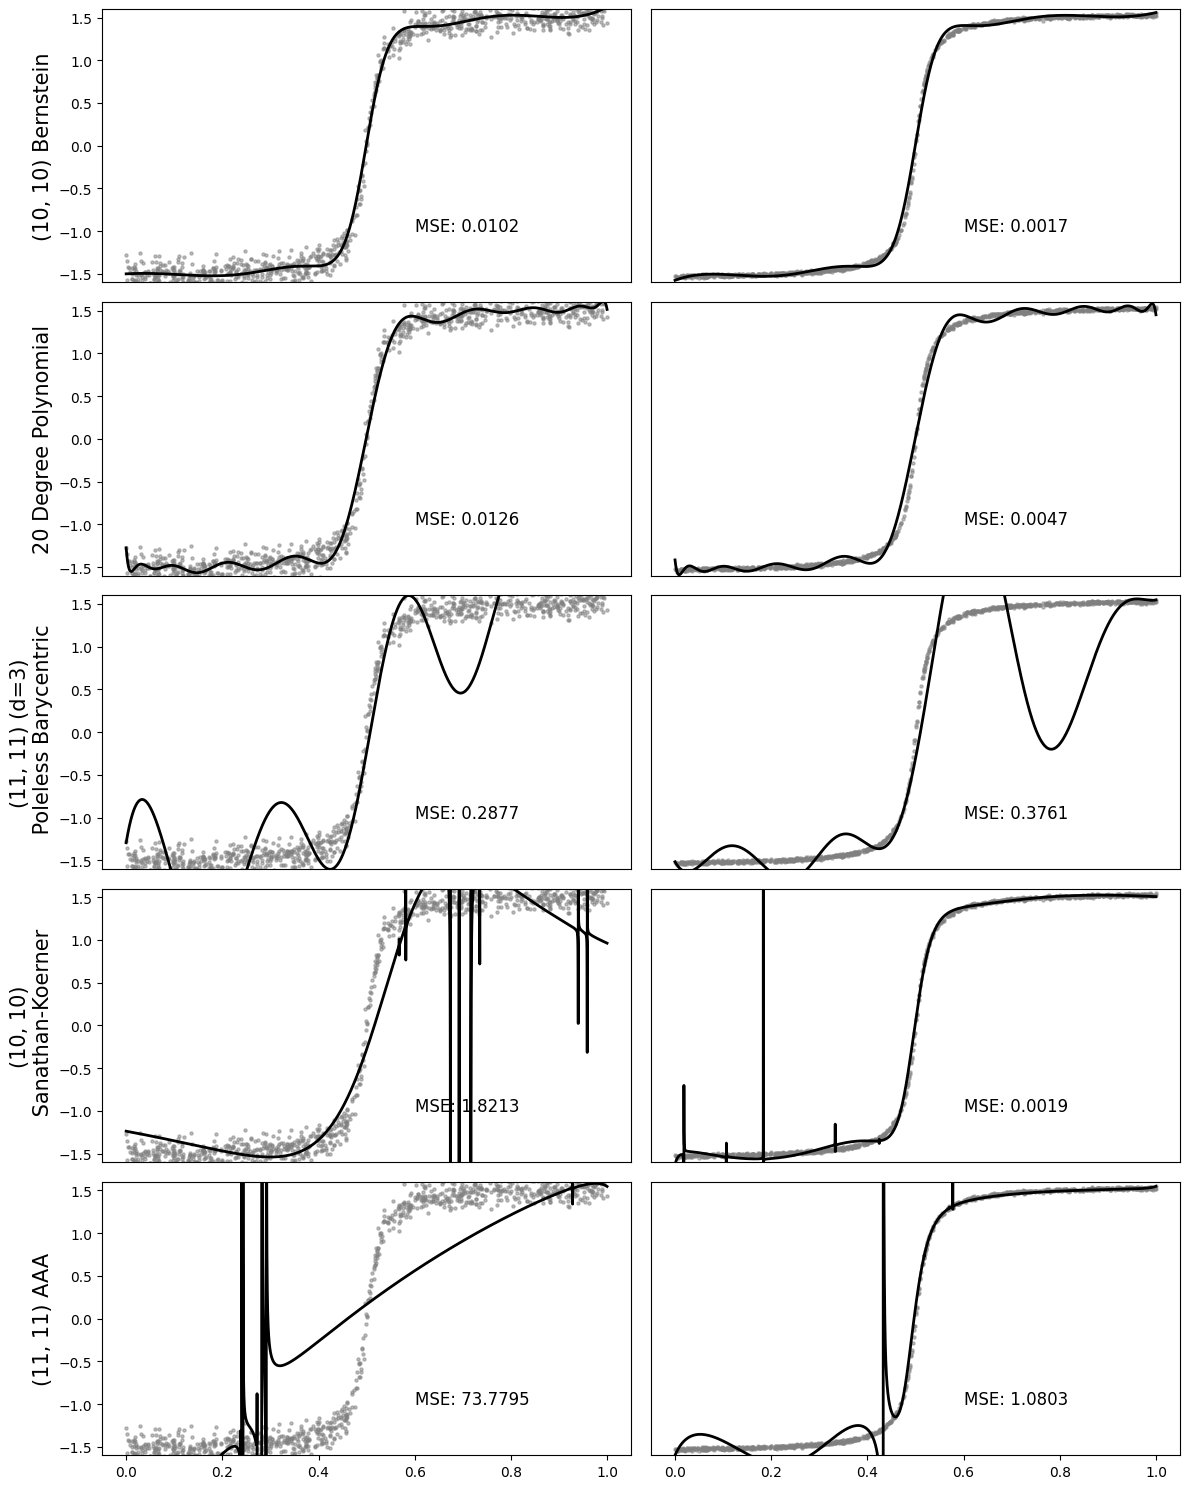

In [7]:
plt.figure(figsize=(12, 15))

x_vals = np.linspace(0, 1, 10_001)

i = 0
for name, approximator in approximators.items():
    plt.subplot(5, 2, i + 1)
    plt.scatter(x, y_large_noise, alpha=0.5, s=5, color='grey')
    
    approximator.fit(x, y_large_noise)
    mse = np.mean((approximator(x) - y_large_noise) ** 2)
    
    plt.plot(x_vals, approximator(x_vals), linewidth=2, color='black')
    plt.text(0.6, -1, f"MSE: {mse:.4f}", fontsize=12)
    
    plt.ylim(-1.6, 1.6)
    if name == 'Polynomial':
        plt.ylabel(f"{approximator.n} Degree Polynomial", size=15)
    elif name in ['Bernstein', 'AAA']:
        plt.ylabel(f"{approximator.n, approximator.m} {name}", size=15)
    elif name == 'Poleless Barycentric':
        plt.ylabel(f"{approximator.n, approximator.m} (d={approximator.d})\n {name}", size=15)
    else:
        plt.ylabel(f"{approximator.n, approximator.m}\n {name}", size=15)
    
    if i < 8:
        plt.xticks([], [])
    
    
    plt.subplot(5, 2, i + 2)
    plt.scatter(x, y_small_noise, alpha=0.5, s=5, color='grey')
    
    approximator.fit(x, y_small_noise)
    mse = np.mean((approximator(x) - y_small_noise) ** 2)
    
    plt.plot(x_vals, approximator(x_vals), linewidth=2, color='black')
    plt.text(0.6, -1, f"MSE: {mse:.4f}", fontsize=12)
    
    plt.yticks([], [])
    plt.ylim(-1.6, 1.6)
    
    if i < 8:
        plt.xticks([], [])
    
    i += 2
    
plt.tight_layout()
plt.savefig(f"noisy_data_fits.png", dpi=150)

# No Noise

In [8]:
approximators = {'Bernstein': Bernstein(n, m, max_iter=1000, gamma=0.5),
                 'Linearized Bernstein': LinearizedBernstein(n, m, max_iter=1000, gamma=0.5),
                 'Polynomial': Bernstein(2 * n, 0),
                 'Poleless Barycentric': PolelessBarycentric(n + 1, m + 1),
                 'Sanathan-Koerner': SKApproximator(n, m),
                 'AAA': AAAApproximator(n + 1, m + 1)}

In [9]:
f = lambda x: np.arctan(50 * (x - 0.5))

x = np.linspace(0, 1, 1001)
y = f(x)

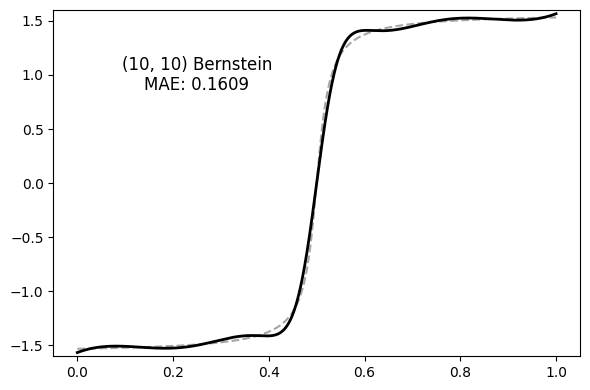

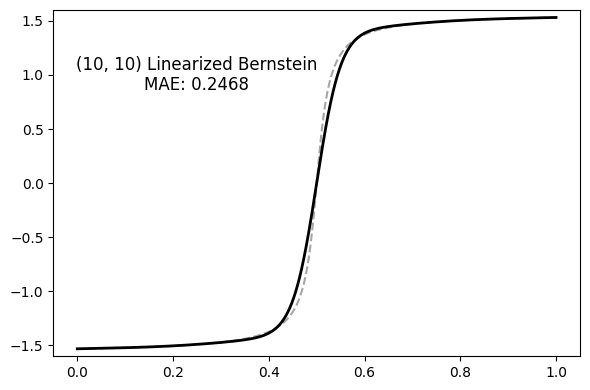

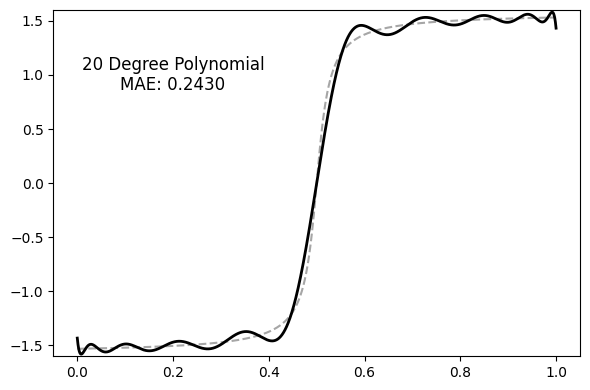

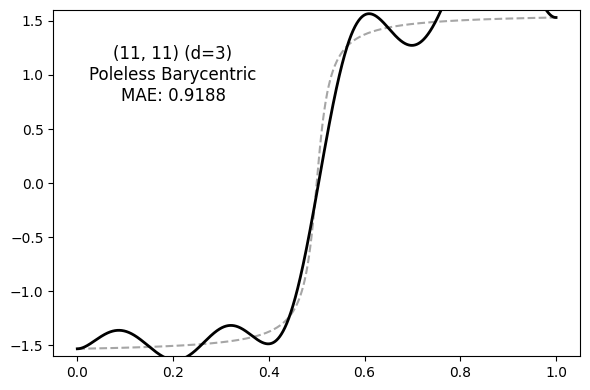

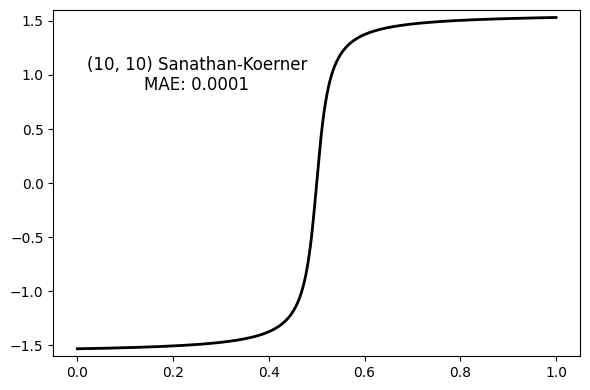

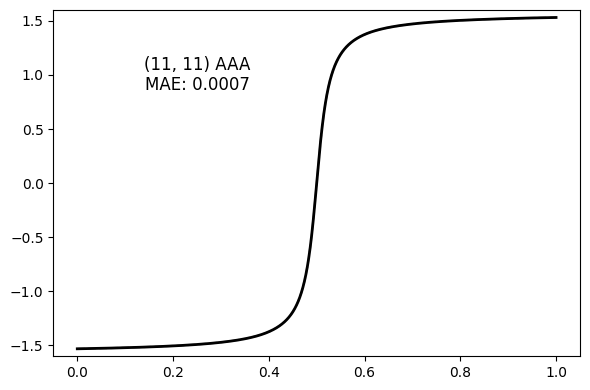

In [10]:
x_vals = np.linspace(0, 1, 10_001)

for name, approximator in approximators.items():
    plt.figure(figsize=(6, 4))
    plt.plot(x, y, '--', alpha=0.7, color='grey')
    
    approximator.fit(x, y)
    mae = np.max(abs(approximator(x) - y))
    
    plt.plot(x_vals, approximator(x_vals), linewidth=2, color='black')
    
    if name == 'Polynomial':
        plt.text(0.2, 1, f"{approximator.n} Degree {name}\nMAE: {mae:.4f}", fontsize=12, 
                 horizontalalignment='center', verticalalignment='center')
    elif name == 'Poleless Barycentric':
        plt.text(0.2, 1, f"{approximator.n, approximator.m} (d={approximator.d})\n{name}\nMAE: {mae:.4f}", 
                 fontsize=12, horizontalalignment='center', verticalalignment='center')
    else:
        plt.text(0.25, 1, f"{approximator.n, approximator.m} {name}\nMAE: {mae:.4f}", fontsize=12, 
                 horizontalalignment='center', verticalalignment='center')
    
    plt.ylim(-1.6, 1.6)
    
    
    plt.tight_layout()
    plt.savefig(f"tan_{name}_fits.png", dpi=150)

In [11]:
f = lambda x: abs(10 * (x - 0.5))

x = np.linspace(0, 1, 1001)
y = f(x)

In [ ]:
x_vals = np.linspace(0, 1, 10_001)

for name, approximator in approximators.items():
    plt.figure(figsize=(6, 4))
    plt.plot(x, y, '--', alpha=0.7, color='grey')
    
    approximator.fit(x, y)
    mae = np.max(abs(approximator(x) - y))
    
    plt.plot(x_vals, approximator(x_vals), color='black')
    if name == 'Polynomial':
        plt.text(0.5, 4.9, f"{approximator.n} Degree {name}\nMAE: {mae:.4f}", fontsize=12, 
                 horizontalalignment='center', verticalalignment='center')
    elif name == 'Poleless Barycentric':
        plt.text(0.5, 4.9, f"{approximator.n, approximator.m} (d={approximator.d})\n{name}\nMAE: {mae:.4f}", 
                 fontsize=12, horizontalalignment='center', verticalalignment='center')
    else:
        plt.text(0.5, 4.9, f"{approximator.n, approximator.m} {name}\nMAE: {mae:.4f}", fontsize=12, 
                 horizontalalignment='center', verticalalignment='center')
    
    plt.ylim(-0.2, 5.5)
    
    plt.tight_layout()
    plt.savefig(f"abs_{name}_fits.png", dpi=150)